<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/Modelo_Perceptron_Y_Adaline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica para crear mi primer red neuronal el modelo perceptron.

In [1]:
import numpy as np
class Perceptron(object):
  """Clasificador perceptron.
  parámetros
  -------------------------
  eta : float
  rango de aprendizage( entre 0.0 y 1.0)
  n_iter : int
  pasos por el data set
  random_state : int
  generador de la semilla aleatoria

  Atributos
  -------------------------
  w_ : 1d array
  pesos despues del entrenamiento.
  erros_ : list
  clasificaciones erroneas (actualizadas) en cada epoca.
  """
  def __init__(self, eta=0.1, n_iter=50, random_state =1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    """ Ajustar datos de entrenamiento
    Parámetros
    --------------------
    X:{Array-like}, shape = [n-samples, n_features]
    donde n_samples es el número de muestras y
    n_features es el número de características.
    y : Array-like, shape = [n_samples]
    valores objetivos.
    Returns --- Retorna
    ----------------
    self: Objetc
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1] )
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update= self.eta * (target - self.predict(xi))
        self.w_[1:]+= update*xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
    return np.where(self.net_input(X)>=0.0, 1, -1)

## Para comprobar el funcionamiento del perceptron utlizaremos el dataset del conjunto de datos iris.

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## extraemos 100 etiquetas de clase correspondientes a 50 iris setosa y 50 iris versicolor, convertimos las etiquetas de clase en dos etiquetas enteras 1, -1

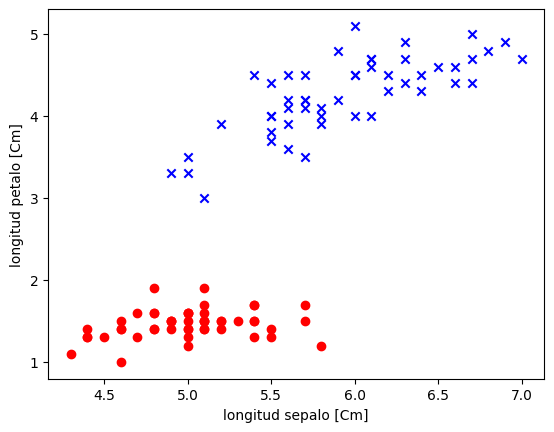

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y= np.where(y == 'Iris-setosa', 1,-1)

#extraer longitud de sépalo y longitud de pétalos.
X = df.iloc[0:100, [0,2]].values

#representar los datos
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue", marker="x", label="versicolor")
plt.xlabel("longitud sepalo [Cm]")
plt.ylabel("longitud petalo [Cm]")
plt.show()

## con el gráfico anterior podemos ver que un límite de decision lineal puede ser suficiente para separar flores setosas de flores versicolor  

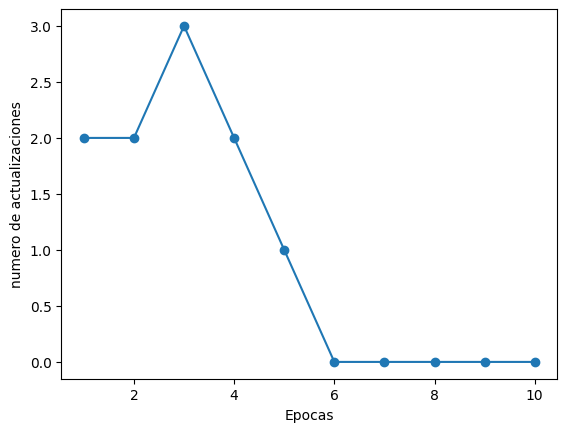

In [4]:
perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y)
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker="o")
plt.xlabel('Epocas')
plt.ylabel('numero de actualizaciones')
plt.show()

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
  #definir un generador de marcadores
  marcadores = ("s","x","o","v","*")
  colores = ('red','blue','lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colores[:len(np.unique(y))])

  #representar la superficie de desicion
  x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max()+1
  x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)
                              )
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha= 0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #representar muestras de clase.
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
               y=X[y == cl, 1],
               alpha= 0.8,
               c=colores[idx],
               marker=marcadores[idx],
               label= cl
               )


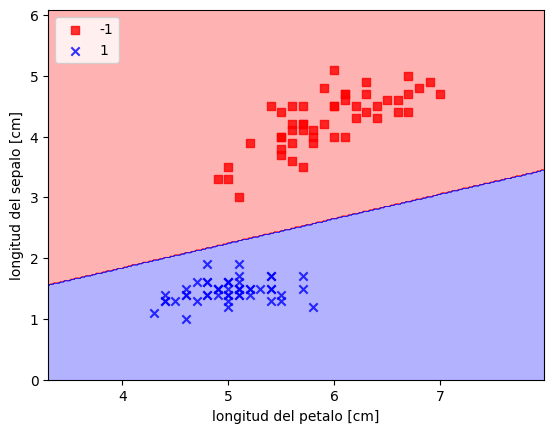

In [6]:
plot_decision_regions(X, y, classifier=perceptron)
plt.xlabel('longitud del petalo [cm]')
plt.ylabel('longitud del sepalo [cm]')
plt.legend(loc='upper left')
plt.show()

# Neurona Lineal Adaptativa (Adaline)

In [7]:
import numpy as np
class AdalineGD(object):
  """Neurona lienal adaptativa Adaline.
  parámetros
  -------------------------
  eta : float
  rango de aprendizage( entre 0.0 y 1.0)
  n_iter : int
  pasos por el data set
  random_state : int
  generador de la semilla aleatoria

  Atributos
  -------------------------
  w_ : 1d array
  pesos despues del entrenamiento.
  erros_ : list
  clasificaciones erroneas (actualizadas) en cada epoca.
  """
  def __init__(self, eta=0.1, n_iter=50, random_state =1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  def fit(self, X, y):
    """ Ajustar datos de entrenamiento
    Parámetros
    --------------------
    X:{Array-like}, shape = [n-samples, n_features]
    donde n_samples es el número de muestras y
    n_features es el número de características.
    y : Array-like, shape = [n_samples]
    valores objetivos.
    Returns --- Retorna
    ----------------
    self: Objetc
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1] )
    self.cost_ = []

    for _ in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:]+= self.eta * X.T.dot(errors)
      self.w_[0]+= self.eta * errors.sum()
      cost = (errors**2).sum()/2.0
      self.cost_.append(cost)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def activation(self, X):
    """Activacion del computo lineal"""
    return X
  def predict(self, X):
    return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

In [8]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)

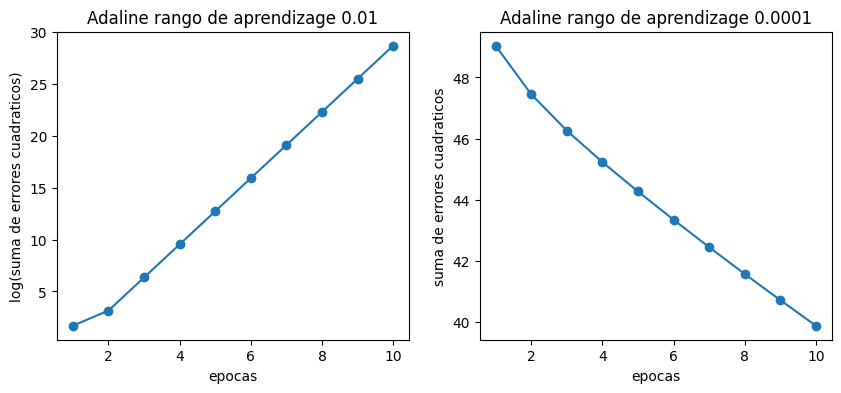

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('epocas')
ax[0].set_ylabel('log(suma de errores cuadraticos)')
ax[0].set_title('Adaline rango de aprendizage 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)

ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('epocas')
ax[1].set_ylabel('suma de errores cuadraticos')
ax[1].set_title('Adaline rango de aprendizage 0.0001')
plt.show()

## vamos a normalizar los datos del conjunto iris.

In [10]:
X_std = np.copy(X)
X_std[:,0] = (X[:, 0 ]-X[:, 0].mean()) / X[:, 0].std()
X_std[:,1] =  (X[:, 1 ]-X[:, 1].mean()) / X[:, 1].std()

## Tras la normalización volvemos a entrenar a Adaline y veremos que ahora converge después de un pequeño número de épocas.

In [11]:
ada3 = AdalineGD(n_iter=15, eta= 0.01)
ada3.fit(X_std, y)

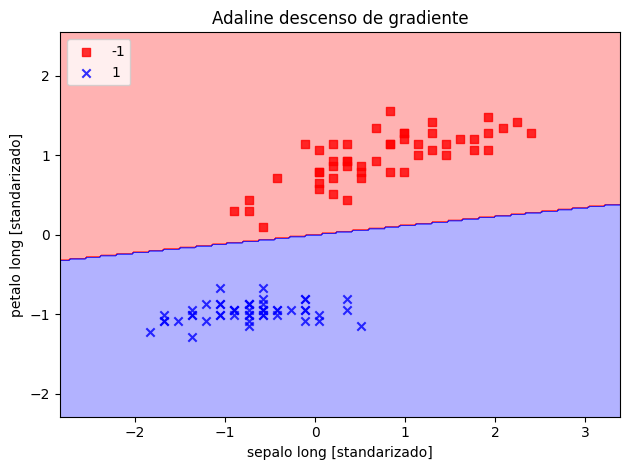

In [12]:
plot_decision_regions(X_std,y, classifier=ada3)
plt.title('Adaline descenso de gradiente')
plt.xlabel('sepalo long [standarizado]')
plt.ylabel('petalo long [standarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

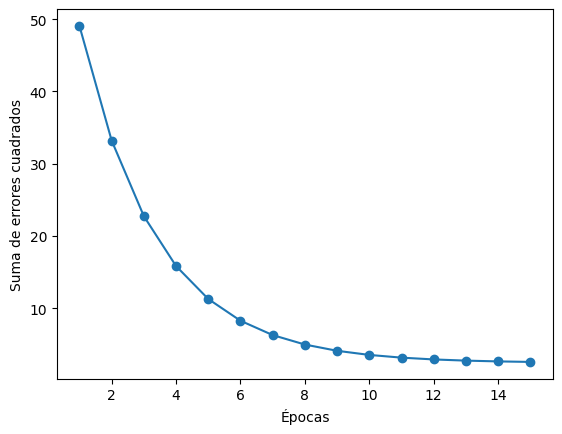

In [13]:
plt.plot(range(1,len(ada3.cost_)+ 1 ), ada3.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Suma de errores cuadrados')
plt.show()

## Neurona adaline con descenso de gradiente estocastico.

In [14]:
class AdalineSGD(object):
  """clasificador neuronal lineal adaptativo
  parametros
  --------------
  eta: float
  tasa de aprendizaje (entre 0.0 y 1.0)
  n_iter : int
  pasos por el conjunto de datos de entrenamiento.
  shuffle: Boolean (default: True)
  mezcla los datos de entrenamiento en cadad época si es verdadero para evitar
  patrones repetitivos.
  random_state: int
  semilla para la inicializacion aleatoria de los pesos

  Atributos
  ---------------
  w_ : 1d-array
  pesos despues del entrenamiento
  cost_ : list
  funcion de costo de diferencia-al-cuadrado
  Valor promedio de la función de costo de la suma de cuadrados sobre todas las muestras de entrenamiento en cada épocas.
  """
  def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
    self.eta=eta
    self.n_iter=n_iter
    self.shuffle= shuffle
    self.w_initilized = False
    self.random_state = random_state

  def fit(self, X, y):
    """Fit datos de entrenamiento.
    Parametros
    -------------
    X:{array-like}, shape = [n_samples, n_features]
    vectores de entrenamiento, donde n_samples es el número de muestras
    y n_features es el número de caracteristicas.
    y : array-like, n_shapes = [n_samples]
    valores objetivos
    Retorna
    ----------
    self : object
    """
    self.initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost= sum(cost)/len(y)
      self.cost_.append(avg_cost)
    return self

  def partial_fit(self, X, y):
    """ Ajustar los datos de entrenamiento sin reinicializar los pesos"""
    if not self.w_initilized:
      self.initialize_weights(X.shape[1])
    if y.ravel().shape[0]>1 :
      for xi, target in zip(X, y) :
        self._update_weights(xi, target)
    else :
      self._update_weights(X,y)
    return self
  def _shuffle(self, X,y) :
    """Mezclar los datos de entrenamiento"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]
  def initialize_weights(self, m):
    """inicializar los pesos con un numero pequeño aleatorio"""
    self.rgen = np.random.RandomState(self.random_state)
    self.w_=self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
    self.w_initilized = True
  def _update_weights(self,xi,target):
    """aplicar la regla de adline para actulizar los pesos"""
    output = self.activation(self.net_input(xi))
    error= (target -output)
    self.w_[1:]+=self.eta* xi.dot(error)
    self.w_[0]+=self.eta* error
    cost = 0.5*error**2
    return cost
  def net_input(self, X):
    """calcula entrada neta"""
    return np.dot(X, self.w_[1:])+ self.w_[0]
  def activation(self, X):
    """activacion líneal, devuelve el mismo valor de entrada"""
    return X
  def predict(self, X):
    """retorna la etiqueta de clase despues del paso por la unidad"""
    return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

In [15]:
AdaSGD = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
AdaSGD.fit(X_std, y)

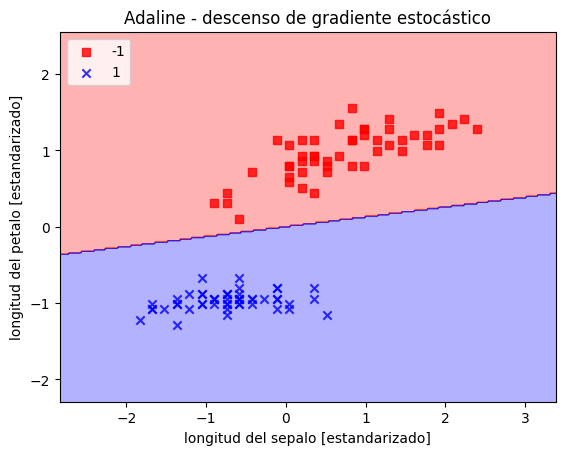

In [16]:
plot_decision_regions(X_std, y, classifier=AdaSGD)
plt.title('Adaline - descenso de gradiente estocástico')
plt.xlabel('longitud del sepalo [estandarizado]')
plt.ylabel('longitud del petalo [estandarizado]')
plt.legend(loc='upper left')
plt.show()

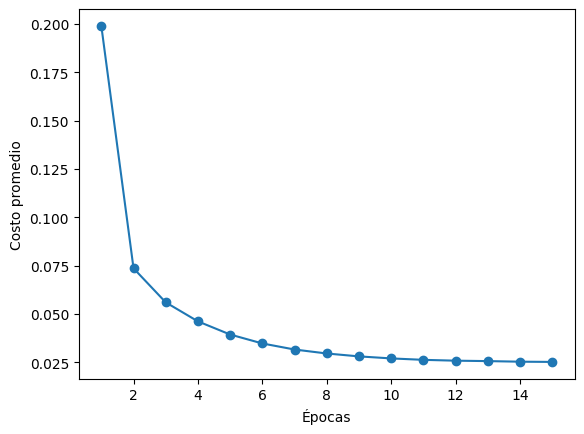

In [17]:
plt.plot(range(1, len(AdaSGD.cost_)+1), AdaSGD.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Costo promedio')
plt.show()

# Entrenar un perceptron con Scikit-Learn.
## Vamos a entrenar a un modelo perceptron con la api de scikit-learn y el dataset iris versicolor.

In [18]:
from sklearn import datasets
import numpy as np


In [19]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Etiquetas de clases: ', np.unique(y))

Etiquetas de clases:  [0 1 2]


## Como podemos ver los nombres de las etiquetas de clase se sncuentran almacenados como enteros iris-setosa, iris-versicolor e iris-virginica. Aquí: 0,1,2.

In [20]:
# vamos a dividir el dataset en conjuntos de datos de prueba y entrenamiento.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)
# la semilla aletoria es para que nuestro resultado sea reproducible.

##Mediante stratify=y buscamos que los subconjuntos de datos de entrenamiento y prueba sean devueltos con las mismas cantidad de etiquetas. Las siguientes lineas de código lo ilustrarán mejor.  

In [21]:
#np.bincount() Cuenta los numeros de coincidencias de etiquetas en una matriz.
print('Conteo de etiquetas en y : ', np.bincount(y))

Conteo de etiquetas en y :  [50 50 50]


In [22]:
print('Conteo de etiquetas en y_train : ', np.bincount(y_train))

Conteo de etiquetas en y_train :  [35 35 35]


In [23]:
print('Conteo de etiquetas en y_test : ', np.bincount(y_test))

Conteo de etiquetas en y_test :  [15 15 15]


## Vamos a normalizar las caracteristicas con StandarScaler de Scikit-Learn

In [24]:
from sklearn.preprocessing import StandardScaler
standar_escaler = StandardScaler()
standar_escaler.fit(X_train)
X_train_std = standar_escaler.transform(X_train)
X_test_std = standar_escaler.transform(X_test)

## Una vez normalizados los datos de entrenamiento, ya podemos entrenar un modelo de perceptrón.

In [25]:
from sklearn.linear_model import Perceptron


In [26]:
# El libro indica n_iter=40 pero ya no se implementa n_iter. En su lugar esta max_iter.
ppn = Perceptron(max_iter= 40 , eta0= 0.01, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, max_iter=40, random_state=1)

## Ya podemos hacer predicciones mediante el método predict.

In [27]:
y_predict = ppn.predict(X_test_std)
print('Muestras mal clasificadas: %d' %(y_test != y_predict).sum())

Muestras mal clasificadas: 2


In [28]:
# Vamos a calcular la precision del perceptron
from sklearn.metrics import accuracy_score
print('Precison del modelo: %.2f'% accuracy_score(y_test, y_predict))

Precison del modelo: 0.96


In [29]:
#vamos a calcular la precisiond desde el mismo percepron.
ppn.score(X_test_std, y_test)

0.9555555555555556

## Vamos a hacer unas modificacciones a nuestra función de plot_desicion_regions para mostrar los límites de decisión del perceptron que acabamos de entrenar.

In [61]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regionsNew(X, y, classifier, test_idx=None, resolution = 0.02):
  #definir un generador de marcadores y mapa de colores.
  marcadores = ("s","x","o","^","v")
  colores = ('red','blue','lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colores[:len(np.unique(y))])

  #representar la superficie de desicion
  x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max()+1
  x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max()+1

  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution)
                              )
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha= 0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #representar muestras de clase.
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
               y=X[y == cl, 1],
               alpha= 0.8,
               c=colores[idx],
               marker=marcadores[idx],
               label= cl,
               edgecolors= 'black'
               )
  # Destaca las muestras de prueba
  if test_idx:
    #representa todas las muestras.
    x_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(x_test[:, 0], x_test[:, 1], c='#f1ffff', edgecolors='black', alpha=1.0,
                linewidths=1, marker='o', s=100, label='test set')

## Con está modificación ya podemos especificar los índices de las muestras que queremos maracar en los diagramas resultantes.

<ipython-input-61-30dc01704260>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


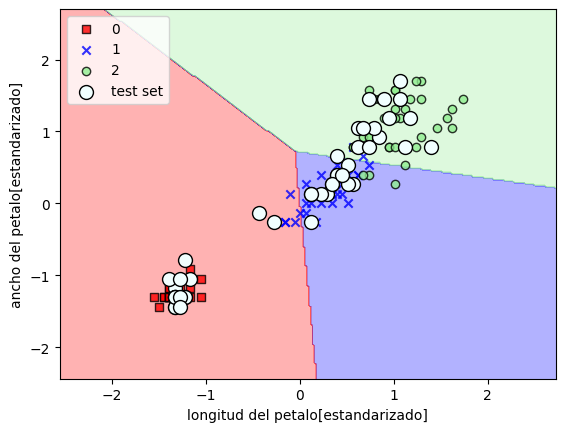

In [62]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regionsNew(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('longitud del petalo[estandarizado]')
plt.ylabel('ancho del petalo[estandarizado]')
plt.legend(loc='upper left')
plt.show()

## Como podemos ver en el diagrama anterior, las tres clases de flores no pueden separarse con un límite de desición líneal.  